In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Sequential
from keras.optimizers import Nadam
from keras.layers import InputLayer,ConvLSTM2D, Conv2D
from keras.layers import BatchNormalization
from keras.activations import tanh
from keras.layers import Reshape
from tensorflow.keras import layers
import datetime as dt
from tensorflow import keras
import sqlite3

In [2]:
df = pd.read_csv(r"C:\Users\ps\PycharmProjects\pythonProject\feature_df.csv")
# Setting Up
df = df.iloc[:-1, :]
df['IV_return_due_1'] = np.log(df['IV_return_due_1'])

In [3]:
df

,target_date,Skew_25D_due_1,Skew_25D_due_2,Skew_25D_due_3,Skew_10D_due_1,Skew_10D_due_2,Skew_10D_due_3,Kurtosis_25D_due_1,Kurtosis_25D_due_2,Kurtosis_25D_due_3,Kurtosis_10D_due_1,Kurtosis_10D_due_2,Kurtosis_10D_due_3,ATMVOL_due_1,ATMVOL_due_2,ATMVOL_due_3,next_ATMVOL_due_1,IV_return_due_1
0,20160128,0.975415,0.996066,0.947039,0.988022,1.012953,0.961269,1.002033,1.004985,1.024215,1.001257,1.008953,1.018659,0.422039,0.403719,0.376620,0.407104,-0.036029
1,20160129,1.122882,1.004805,0.949886,1.033338,1.027179,0.958050,1.010114,1.006217,1.056335,0.997495,1.013713,1.009244,0.407104,0.402194,0.373117,0.354085,-0.139531
2,20160201,1.041328,0.987966,0.918007,1.005593,1.019239,0.971125,1.022640,1.000340,0.998275,0.998762,0.992401,0.995575,0.354085,0.386551,0.380105,0.330419,-0.069175
3,20160202,1.012441,0.950256,0.982237,1.022222,0.982544,1.024522,1.017235,1.007789,1.005066,1.001951,0.993319,0.958205,0.330419,0.368654,0.376598,0.333515,0.009326
4,20160203,1.021533,0.953320,0.900281,1.008441,0.993267,0.969278,1.028413,1.022188,0.987491,1.010964,1.008631,0.958547,0.333515,0.359272,0.370518,0.341932,0.024922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1400,20230406,1.022014,1.017788,0.999960,1.023026,1.015247,1.005050,1.002014,1.014630,1.018022,1.000944,1.007092,1.000313,0.161652,0.167877,0.172263,0.151567,-0.064421
1401,20230407,1.023743,1.036903,0.988937,1.010624,1.013452,1.000846,1.019071,1.027883,1.016367,1.002466,1.001801,1.006544,0.151567,0.162653,0.169434,0.146740,-0.032362
1402,20230410,1.010691,1.011729,1.000068,1.000555,1.016480,0.992200,1.018069,1.007341,1.017692,1.003411,1.003733,1.004768,0.146740,0.160837,0.167362,0.143034,-0.025585
1403,20230411,1.027370,1.021349,1.015298,1.001869,1.012510,1.002814,1.009628,1.001533,1.013855,0.999685,0.998667,1.001311,0.143034,0.158107,0.165860,0.140519,-0.017736


In [4]:
data = df.set_index(df['target_date'])
data.drop(['target_date'], axis=1)

,Skew_25D_due_1,Skew_25D_due_2,Skew_25D_due_3,Skew_10D_due_1,Skew_10D_due_2,Skew_10D_due_3,Kurtosis_25D_due_1,Kurtosis_25D_due_2,Kurtosis_25D_due_3,Kurtosis_10D_due_1,Kurtosis_10D_due_2,Kurtosis_10D_due_3,ATMVOL_due_1,ATMVOL_due_2,ATMVOL_due_3,next_ATMVOL_due_1,IV_return_due_1
target_date,,,,,,,,,,,,,,,,,
20160128,0.975415,0.996066,0.947039,0.988022,1.012953,0.961269,1.002033,1.004985,1.024215,1.001257,1.008953,1.018659,0.422039,0.403719,0.376620,0.407104,-0.036029
20160129,1.122882,1.004805,0.949886,1.033338,1.027179,0.958050,1.010114,1.006217,1.056335,0.997495,1.013713,1.009244,0.407104,0.402194,0.373117,0.354085,-0.139531
20160201,1.041328,0.987966,0.918007,1.005593,1.019239,0.971125,1.022640,1.000340,0.998275,0.998762,0.992401,0.995575,0.354085,0.386551,0.380105,0.330419,-0.069175
20160202,1.012441,0.950256,0.982237,1.022222,0.982544,1.024522,1.017235,1.007789,1.005066,1.001951,0.993319,0.958205,0.330419,0.368654,0.376598,0.333515,0.009326
20160203,1.021533,0.953320,0.900281,1.008441,0.993267,0.969278,1.028413,1.022188,0.987491,1.010964,1.008631,0.958547,0.333515,0.359272,0.370518,0.341932,0.024922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20230406,1.022014,1.017788,0.999960,1.023026,1.015247,1.005050,1.002014,1.014630,1.018022,1.000944,1.007092,1.000313,0.161652,0.167877,0.172263,0.151567,-0.064421
20230407,1.023743,1.036903,0.988937,1.010624,1.013452,1.000846,1.019071,1.027883,1.016367,1.002466,1.001801,1.006544,0.151567,0.162653,0.169434,0.146740,-0.032362
20230410,1.010691,1.011729,1.000068,1.000555,1.016480,0.992200,1.018069,1.007341,1.017692,1.003411,1.003733,1.004768,0.146740,0.160837,0.167362,0.143034,-0.025585


In [5]:
converted_df = pd.DataFrame(columns=['Date', 'Due','Skew_25', 'Skew_10', 'K_25', 'K_10', 'ATM_VOL'] )
n = 0 
for date in np.array(data.iloc[:,0]):
    new_row = [date]
    for i in range(1,4):
        new_row.append(i)
        new_row.append(data.iloc[n,i])
        new_row.append(data.iloc[n,i+3])
        new_row.append(data.iloc[n,i+6])
        new_row.append(data.iloc[n,i+9])
        new_row.append(data.iloc[n,i+12])
        converted_df.loc[len(converted_df.index)] = new_row 
        new_row = [date]
    n += 1 
# converted_df['Due'] = converted_df['Due'].round(0).astype(int)
# converted_df['Date'] = pd.to_datetime(converted_df['Date'], format='%Y%m%d')   
# converted_df = converted_df.set_index(converted_df['Date'], converted_df['Due'])
# converted_df.drop(['Date'], axis=1)
converted_df = converted_df.drop(['Date', 'Due'], axis=1)

In [6]:
index_list = []
for date in np.array(data.iloc[:,0]):
    for i in range(1,4):
        index_list.append((pd.to_datetime(date, format='%Y%m%d') ,i))
multi_index = pd.MultiIndex.from_tuples(index_list, names=['Date', 'Due'])
converted_df = converted_df.set_index(multi_index)

In [7]:
converted_df

Skew_25   Skew_10      K_25      K_10   ATM_VOL
Date       Due                                                  
2016-01-28 1    0.975415  0.988022  1.002033  1.001257  0.422039
           2    0.996066  1.012953  1.004985  1.008953  0.403719
           3    0.947039  0.961269  1.024215  1.018659  0.376620
2016-01-29 1    1.122882  1.033338  1.010114  0.997495  0.407104
           2    1.004805  1.027179  1.006217  1.013713  0.402194
...                  ...       ...       ...       ...       ...
2023-04-11 2    1.021349  1.012510  1.001533  0.998667  0.158107
           3    1.015298  1.002814  1.013855  1.001311  0.165860
2023-04-12 1    1.002721  0.993350  1.019731  1.000000  0.140519
           2    1.019367  1.016318  1.007119  1.003290  0.154520
           3    0.996881  0.985703  1.011628  0.999185  0.163597

[4215 rows x 5 columns]

In [8]:
params = converted_df.columns.tolist()
expiries = converted_df.index.get_level_values(1).unique().tolist()

In [9]:
# Scaling
def fit_scalers( train_x, train_y, scaler_to_use ):
    input_scalers = []
    for i in range( train_x.shape[-2] ):
        scaler = scaler_to_use()
        scaler.fit( train_x[...,i,:].reshape(-1, train_x.shape[-3] ) )
        input_scalers.append( scaler )

    pred_scalers = []
    for i in range(train_y.shape[-1]):
        scaler = scaler_to_use()
        scaler.fit( train_y[...,i].reshape(-1, train_y.shape[-2] ) )
        pred_scalers.append( scaler )
        
    return input_scalers, pred_scalers

In [10]:
def scale_input( data, input_scalers ):
    scaled_params = []
    for i, scaler in enumerate( input_scalers ):
        scaled_param = scaler.transform( data[...,i,:].reshape( -1,len(expiries) ) )
        scaled_params.append(scaled_param)
    return np.stack( scaled_params, -1 ).reshape(data.shape)

In [11]:
def scale_target( data, pred_scalers, reverse = False ):
    scaled_params = []
    for i, scaler in enumerate( pred_scalers ):
        transformation = scaler.inverse_transform if reverse else scaler.transform
        scaled_param = transformation( data[...,i].reshape( -1,len(expiries) ) )
        scaled_params.append(scaled_param)
    return np.stack( scaled_params, -1 ).reshape(data.shape)

In [12]:
def get_data(train : "tuple", 
             predict : "tuple", 
             model_lags : int,
             scaler : "sklearn.preprocessing.scaler",
             dataset = converted_df, 
             report : "bool" = False, 
             diff_target : "bool" = False):
    
    '''
    The pipeline for pulling data from the timeseries
    Scaling is by default applied
    '''
    
    # make dataset to numpy array (dates,expiries,parameters)
    param_names = dataset.columns
    dates, expiries = dataset.index.levels
    data = np.stack( dataset.groupby( level = 0 ).apply( lambda dateview: dateview.values ) )

    # some functions to get dates and their indices
    get_dates = lambda slicer: dates[ dates.slice_indexer( *len(slicer)//2*slicer )  ]
    get_date_indices = lambda dates_subset: np.argwhere( [ date in dates_subset for date in dates ] ).flatten()

    # fetch the dates that we want to predict
    train_dates, test_dates = map( get_dates,(train, predict) )
    train_idxs, test_idxs = map( get_date_indices,(train_dates, test_dates) )
    
    # We need to remove dates where we dont have the sufficient lags to feed the model (i.e. first int(model_lags) dates)
    def adjust_for_lags( dates_idxs ):
        dates, idxs = dates_idxs # unpack
        drop_mask = model_lags<=idxs 
        return dates[ drop_mask ], idxs[ drop_mask ]
    (train_dates, train_idxs),(test_dates,test_idxs) = map( adjust_for_lags, ((train_dates, train_idxs),(test_dates,test_idxs)) )

    # make datasets
    inputs = lambda data, target_idxs: np.stack( [ data[ i - model_lags : i ] for i in target_idxs] )[...,None]
    train_x, test_x = [ inputs( data, idx ) for idx in (train_idxs,test_idxs) ]
    train_y, test_y = [ data[ idx ] - ( data[ idx - 1 ] if diff_target else 0 ) for idx in (train_idxs,test_idxs) ]
        
    # fit the scalers
    input_scalers, target_scalers = fit_scalers( train_x, train_y, scaler )
    
    # save the data
    data = {
        "dates" : {"train":train_dates,"test":test_dates},
        "paramnames" : dataset.columns.values,
        "train" : {"x" : train_x, 
                   "y" : train_y, 
                   "x_scaled" : scale_input(train_x,input_scalers), 
                   "y_scaled" : scale_target(train_y,target_scalers) },
        "test" : {"x" : test_x, 
                  "y" : test_y,
                  "x_scaled" : scale_input(test_x,input_scalers),
                  "y_scaled" : scale_target(test_y,target_scalers),},
        "scalers" : {"x" : input_scalers, "y" : target_scalers}
    }
        
    if report:
        print(
            "Training data goes from: %s to %s" % tuple( f(train_dates).strftime("%Y-%m-%d") for f in (min,max) ),
            "\n  Train input shape:  ", train_x.shape, 
            "\n  Train target shape: ", train_y.shape,
            "\nTest data goes from: %s to %s" % tuple( f(test_dates).strftime("%Y-%m-%d") for f in (min,max) ),
            "\n  Test input shape:  ", test_x.shape,
            "\n  Test target shape: ", test_y.shape, "\n"
        )
        
    return data

In [20]:
from tensorflow.keras.models import Model
from tensorflow.keras import layers

def create_model(n_params, 
                 dropout, 
                 recurrent_dropout, 
                 n_convlstm_layers = 2,
                 hidden_activation =  tf.keras.activations.tanh, 
                 optimizer = keras.optimizers.Adam()):

    # input layer
    input_layer = layers.Input(shape= (None,len(expiries),len(params),1) )
    
    # lstm layers
    lstm = input_layer
    for i in range( n_convlstm_layers ):
        lstm =  layers.ConvLSTM2D( 
            kernel_size= (1,1), 
            filters=n_params, 
            data_format= 'channels_last', 
            return_sequences = i<n_convlstm_layers-1,
            activation=hidden_activation,
            padding = "same",
            dropout=dropout, 
            recurrent_dropout=recurrent_dropout
        )( lstm )
        lstm = layers.BatchNormalization()(lstm)    

    output = layers.Conv2D(
        filters=1, kernel_size=(1, 1), activation="linear", padding="same"
    )( lstm )
    output_layer = layers.Reshape( (len(expiries),len(params)) )(output)

    # compile
    model = Model( input_layer, output_layer )
    model.compile(
        loss= "MAE",
        optimizer=optimizer, 
    ) 
    
    print(model.summary())
    return model

In [21]:
def train_model(model, 
                dataset, 
                verbose = True, 
                save : "dir" = False,
                training_kwarg_overwrites : "dict" = {} ):
    
    # train until we run out of improvement
    callbacks = [
        keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=5),
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=15),
    ]
    
    # train model
    training_kwargs = {
        "x" : dataset["train"]["x_scaled"],
        "y" : dataset["train"]["y_scaled"],
        "epochs" : 200,
        "batch_size" : 64,
        "verbose" : verbose,
        "validation_split" : 0.2,
        "callbacks" : callbacks,
    } 
    training_kwargs.update(training_kwarg_overwrites)
    train_hist = model.fit( **training_kwargs )
    
    if save:
        Path(save).mkdir(parents=True, exist_ok=True) # make a home for the models
        train_start, train_end = [ f( dataset["dates"]["train"] ) for f in (min,max) ]
        model_name = "-".join( date.strftime("%Y%m%d") for date in [train_start, train_end] )
        model.save( save+model_name )
        
    return model, train_hist

In [22]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# data & preprocessing params
train = (None, "2021-11-04")
test = ("2021-11-04",None)
lags = 30
diff_target = False
scaler = MinMaxScaler

# model params
neurons_per_layer = 64
dropout = 0.025
recurrent_dropout = 0.025
n_convlstm_layers = 1
hidden_activation = tf.keras.activations.tanh
optimizer = keras.optimizers.Nadam()

In [23]:
model = create_model( neurons_per_layer, dropout, recurrent_dropout, n_convlstm_layers, hidden_activation, optimizer )
dataset = get_data(train,test,lags,report=1, diff_target = diff_target, scaler = scaler)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, 3, 5, 1)]   0         
                                                                 
 conv_lstm2d (ConvLSTM2D)    (None, 3, 5, 64)          16896     
                                                                 
 batch_normalization (BatchN  (None, 3, 5, 64)         256       
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 3, 5, 1)           65        
                                                                 
 reshape (Reshape)           (None, 3, 5)              0         
                                                                 
Total params: 17,217
Trainable params: 17,089
Non-trainable params: 128
_______________________________________________________

In [24]:
model, train_hist = train_model(
    model, 
    dataset, 
    #training_kwarg_overwrites={"epochs" : 0}, 
    save = False #"./20210801_20_LAG_LSTM/" 
)

Epoch 1/200
14/14 [==============================] - 3s 116ms/step - loss: 0.3823 - val_loss: 0.3101 - lr: 0.0010
Epoch 2/200
14/14 [==============================] - 1s 102ms/step - loss: 0.2360 - val_loss: 0.1836 - lr: 0.0010
Epoch 3/200
14/14 [==============================] - 1s 101ms/step - loss: 0.1116 - val_loss: 0.1152 - lr: 0.0010
Epoch 4/200
14/14 [==============================] - 1s 101ms/step - loss: 0.0771 - val_loss: 0.1105 - lr: 0.0010
Epoch 5/200
14/14 [==============================] - 1s 101ms/step - loss: 0.0721 - val_loss: 0.1145 - lr: 0.0010
Epoch 6/200
14/14 [==============================] - 1s 100ms/step - loss: 0.0709 - val_loss: 0.1125 - lr: 0.0010
Epoch 7/200
14/14 [==============================] - 1s 101ms/step - loss: 0.0705 - val_loss: 0.1127 - lr: 0.0010
Epoch 8/200
14/14 [==============================] - 1s 99ms/step - loss: 0.0713 - val_loss: 0.1120 - lr: 0.0010
Epoch 9/200
14/14 [==============================] - 1s 101ms/step - loss: 0.0706 - val_l

<IPython.core.display.Javascript object>


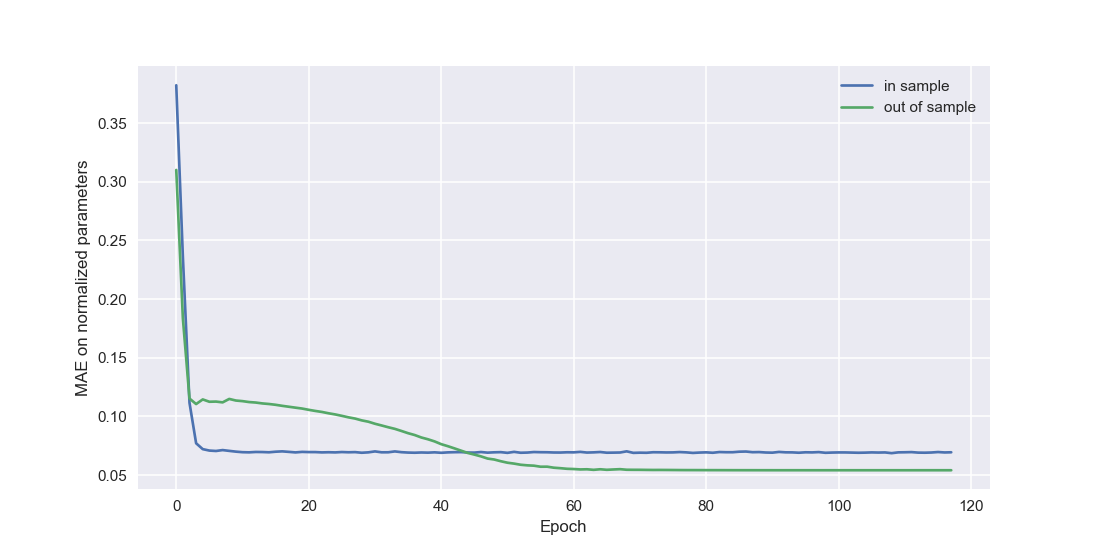

In [25]:
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.style.use("seaborn")

fig, ax = plt.subplots(figsize = (10,5))
ax.plot( train_hist.history["loss"], label = "in sample" )
ax.plot( train_hist.history["val_loss"], label = "out of sample" )
ax.set_xlabel("Epoch")
ax.set_ylabel("MAE on normalized parameters")
ax.legend()
# plt.savefig("./plots/training_development")
plt.show()

## Compare MAE and RMSE on scaled data

In [ ]:
# loss functions
MAE = lambda series: np.mean( abs(series) )
RMSE = lambda series: np.sqrt( np.mean( series**2 ) )

In [56]:
pred = model.predict(dataset['test']['x_scaled'])
MAE(pred - dataset['test']['y_scaled'])

9/9 [==============================] - 0s 8ms/step


0.056515446007679965

In [57]:
RMSE(pred - dataset['test']['y_scaled'])

0.07836744631541527